**Fraud Check**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


**Feature Engineering**

In [6]:
data1=data.copy()

list=[]
for i in range(0,len(data)):
  if data['Taxable.Income'][i]<=30000:
    list.append('Risky')
  else:
    list.append('Good')

data1['loan_asset_type']=list
data1


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,loan_asset_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
data1['loan_asset_type'].value_counts()

Good     476
Risky    124
Name: loan_asset_type, dtype: int64

**Data Visualization**

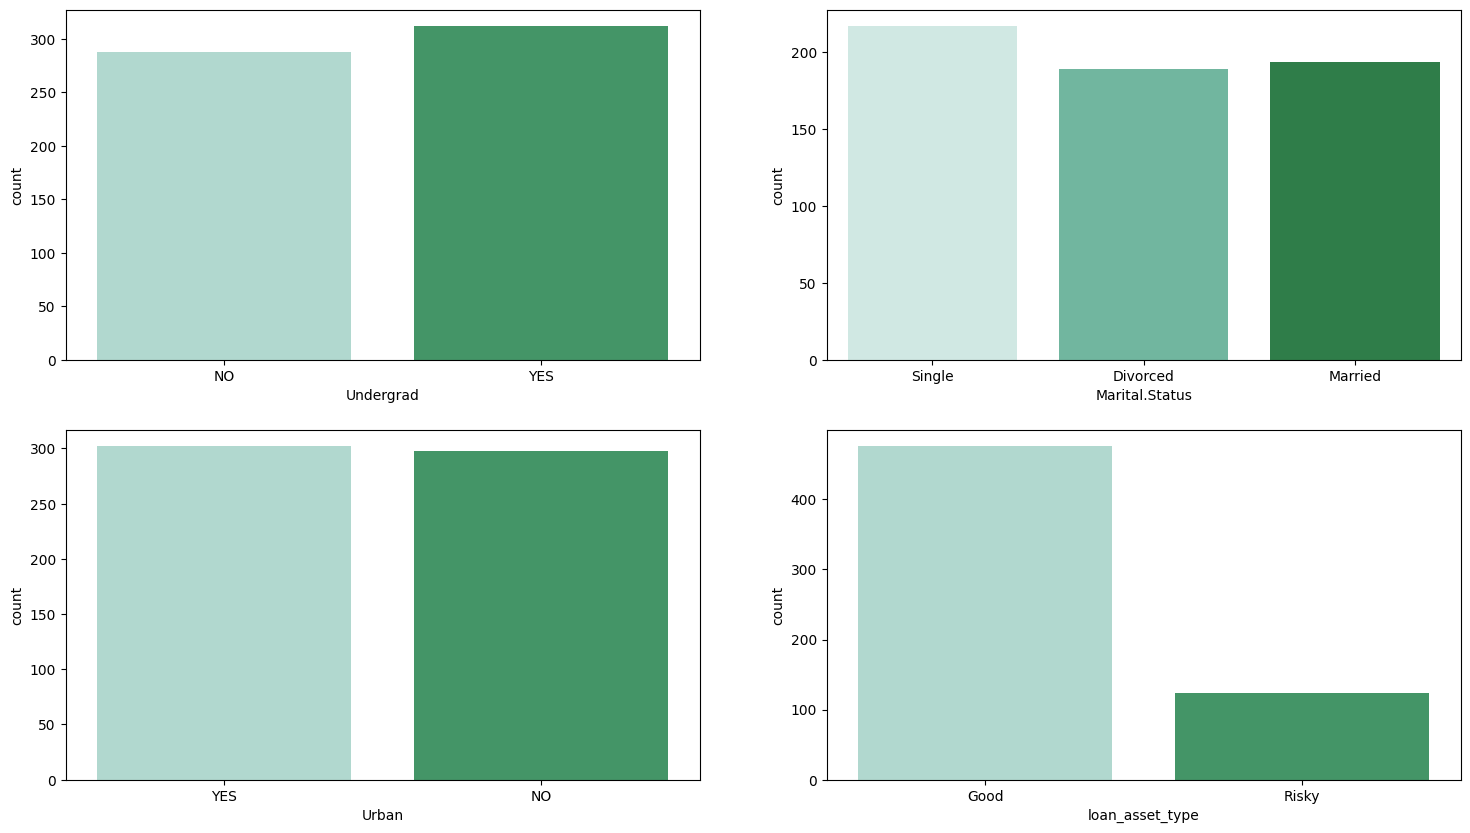

In [8]:
#Countplot for categorical variables
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(x='Undergrad',data=data1, palette='BuGn')
plt.subplot(2,2,2)
sns.countplot(x='Marital.Status',data=data1, palette='BuGn')

plt.subplot(2,2,3)
sns.countplot(x='Urban', data=data1,palette='BuGn')
plt.subplot(2,2,4)
sns.countplot(x='loan_asset_type',data=data1, palette='BuGn')

plt.show()

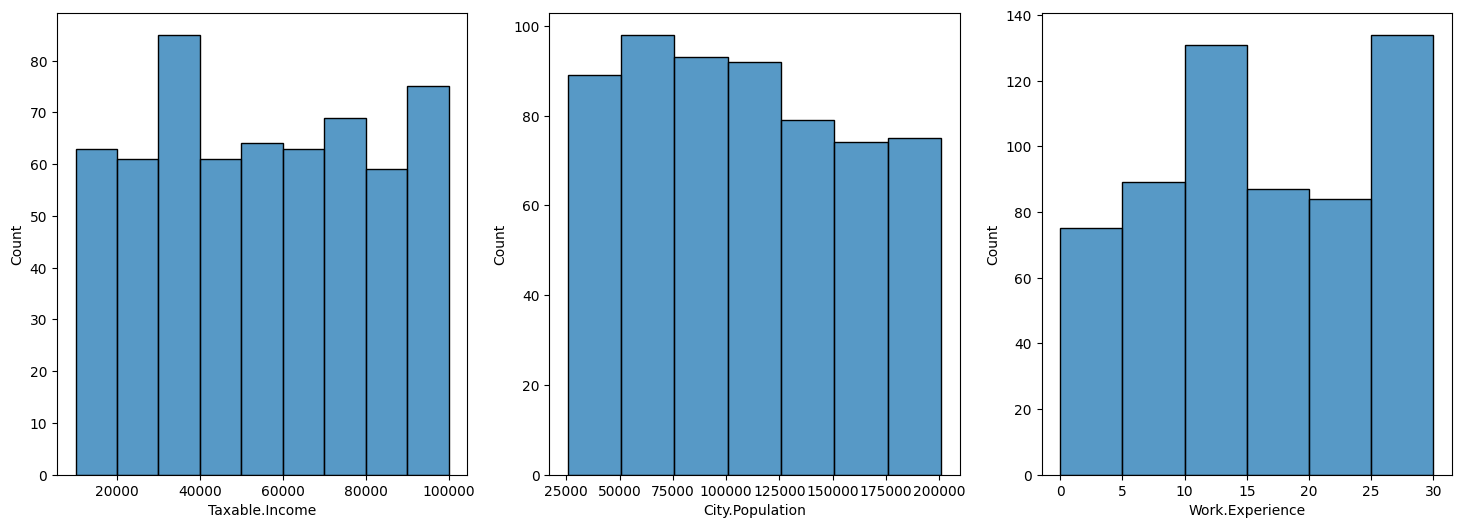

In [9]:
#Histogram for continuous variables
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.histplot(data1['Taxable.Income'],bins=range(min(data1['Taxable.Income']),max(data1['Taxable.Income'])+10000, 10000));

plt.subplot(1,3,2)
sns.histplot(data1['City.Population'],bins=range(min(data1['City.Population']),max(data1['City.Population'])+25000, 25000));

plt.subplot(1,3,3)
sns.histplot(data1['Work.Experience'],bins=range(min(data1['Work.Experience']),max(data1['Work.Experience'])+5, 5));

<Axes: >

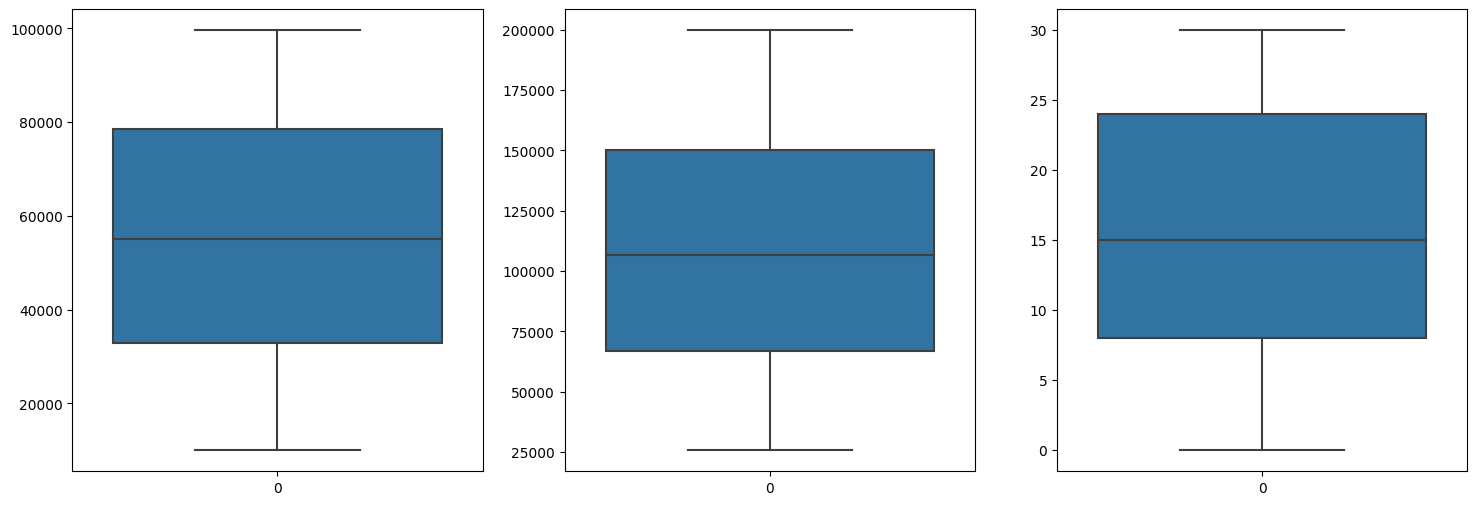

In [10]:
#Boxplot

plt.figure(figsize=(18,6))


plt.subplot(1,3,1)
sns.boxplot(data1['Taxable.Income'])

plt.subplot(1,3,2)
sns.boxplot(data1['City.Population'])

plt.subplot(1,3,3)
sns.boxplot(data1['Work.Experience'])

In [11]:
#Univariate Analysis

loan_asset_risky=pd.DataFrame()
loan_asset_good=pd.DataFrame()

loan_asset_risky = data1.loc[data1['loan_asset_type']=='Risky']
loan_asset_good = data1.loc[data1['loan_asset_type']=='Good']

**Taxable income wrt fraud**

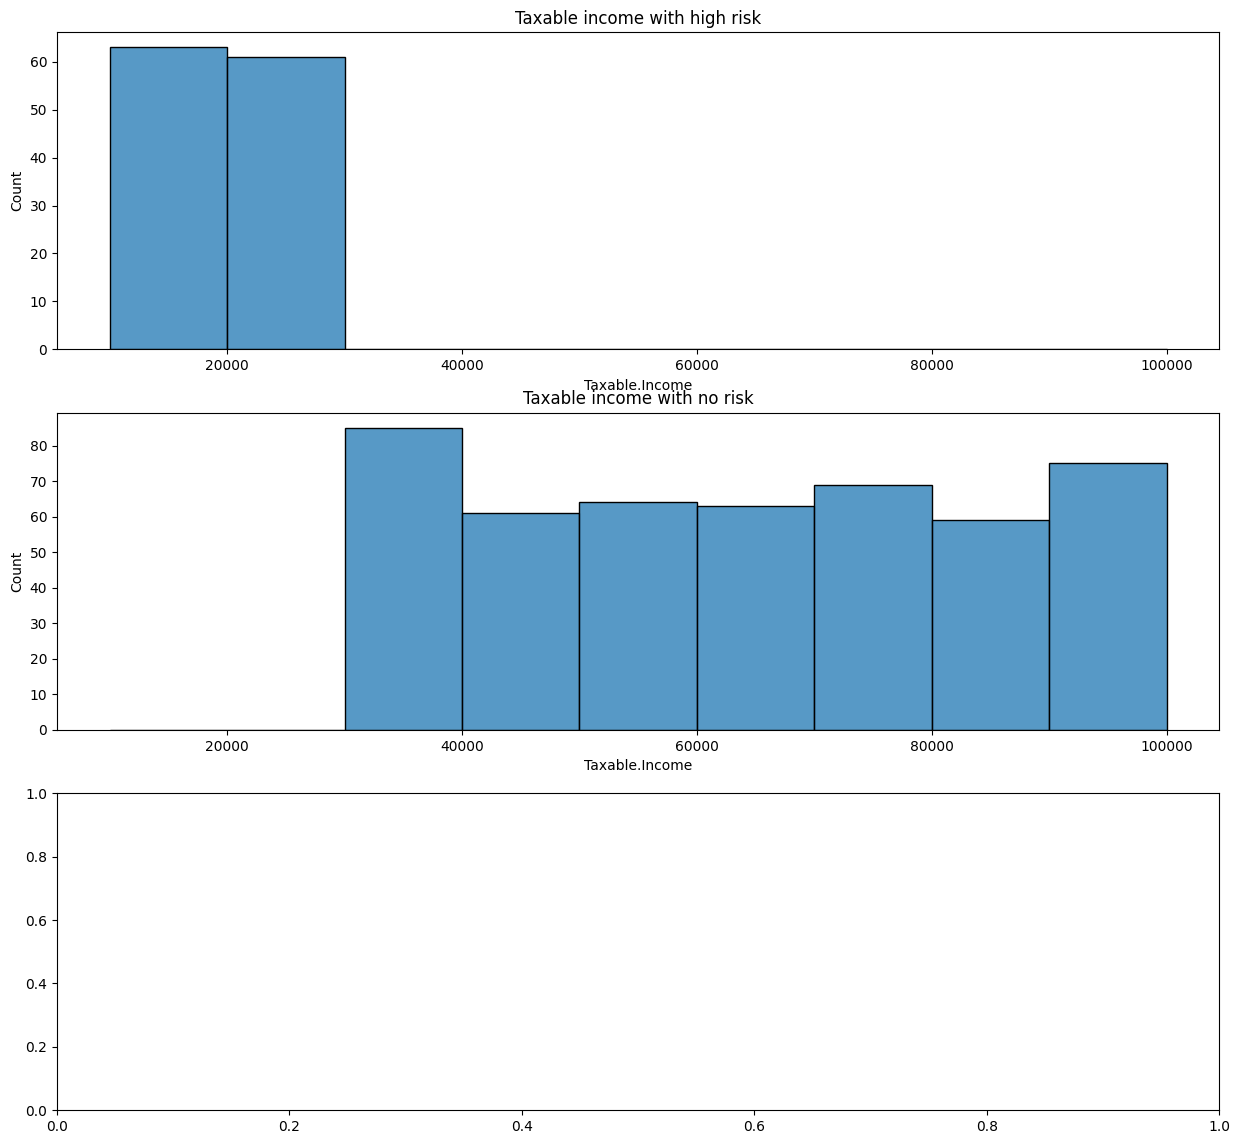

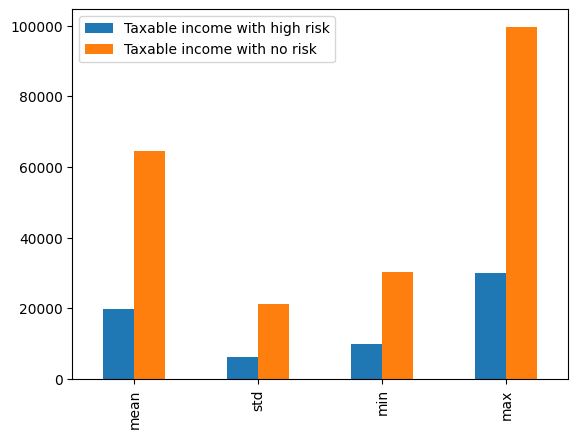

In [12]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
sns.histplot(loan_asset_risky['Taxable.Income'],bins=range(min(data1['Taxable.Income']),max(data1['Taxable.Income'])+10000,10000))
plt.title('Taxable income with high risk')

plt.subplot(3,1,2)
sns.histplot(loan_asset_good['Taxable.Income'],bins=range(min(data1['Taxable.Income']),max(data1['Taxable.Income'])+10000,10000))
plt.title('Taxable income with no risk')

income_describe=pd.DataFrame()

income_describe['Taxable income with high risk']=loan_asset_risky['Taxable.Income'].describe()
income_describe['Taxable income with no risk']=loan_asset_good['Taxable.Income'].describe()
income_describe=income_describe.drop(['count','25%','50%','75%'])

plt.subplot(3,1,3)
income_describe.plot.bar()

plt.show()

**Undergrad wrt fraud**

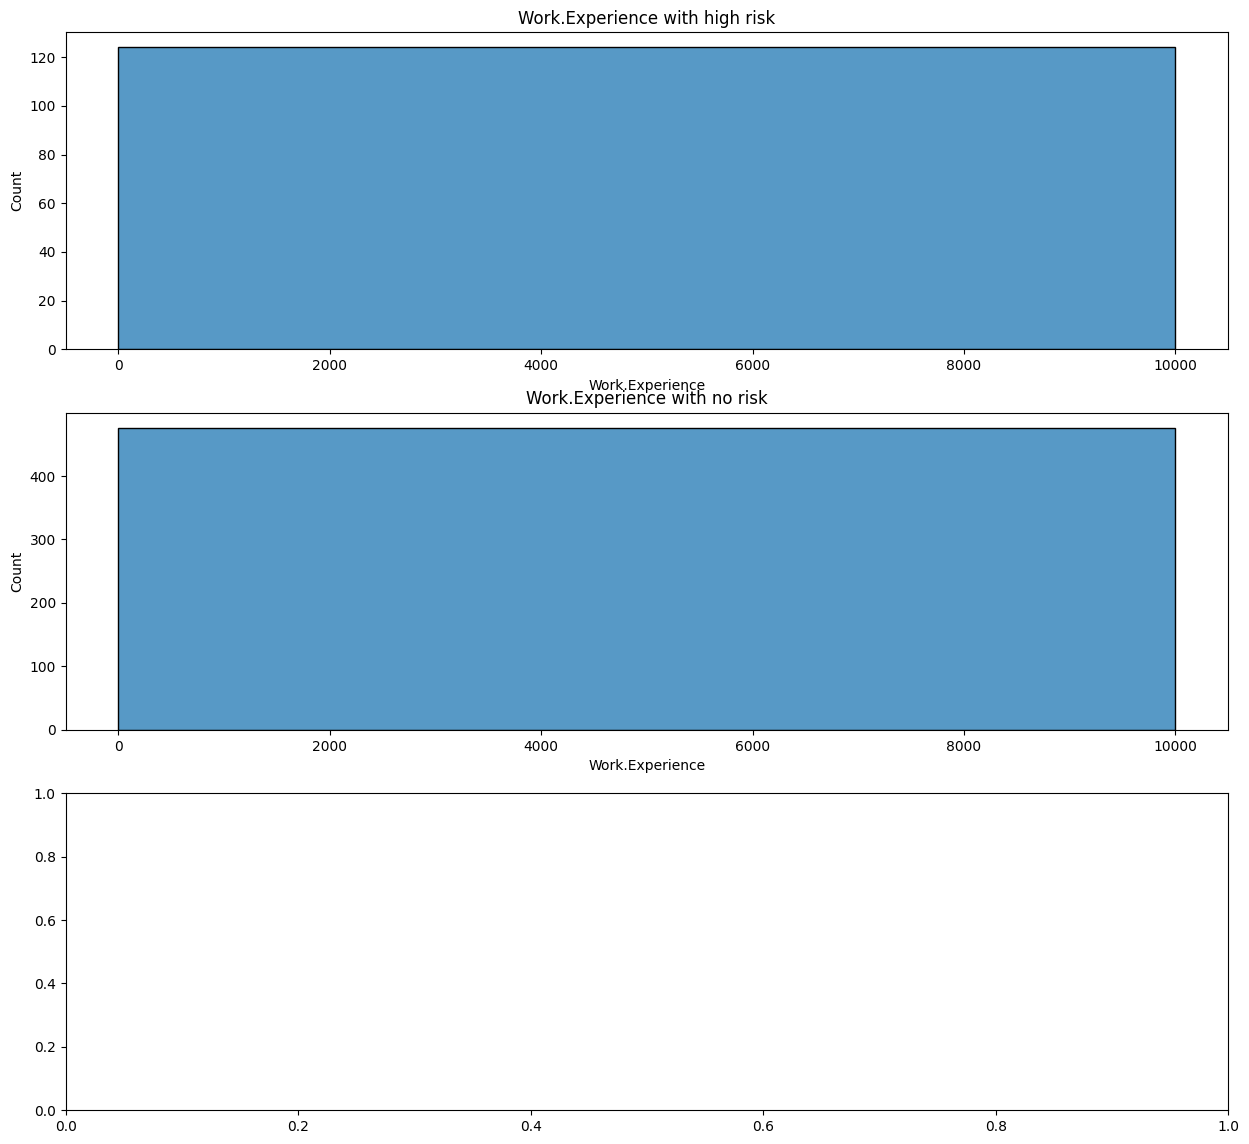

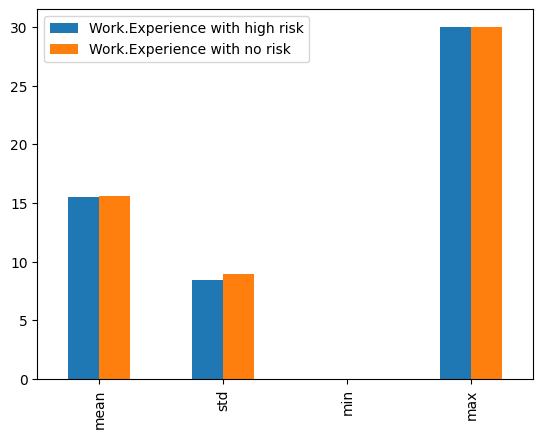

In [13]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
sns.histplot(loan_asset_risky['Work.Experience'],bins=range(min(data1['Work.Experience']),max(data1['Work.Experience'])+10000,10000))
plt.title('Work.Experience with high risk')

plt.subplot(3,1,2)
sns.histplot(loan_asset_good['Work.Experience'],bins=range(min(data1['Work.Experience']),max(data1['Work.Experience'])+10000,10000))
plt.title('Work.Experience with no risk')

exp_describe=pd.DataFrame()

exp_describe['Work.Experience with high risk']=loan_asset_risky['Work.Experience'].describe()
exp_describe['Work.Experience with no risk']=loan_asset_good['Work.Experience'].describe()
exp_describe=exp_describe.drop(['count','25%','50%','75%'])

plt.subplot(3,1,3)
exp_describe.plot.bar()

plt.show()

**Undergrad wrt fraud**

Text(0.5, 1.0, 'Undergrad with no risk')

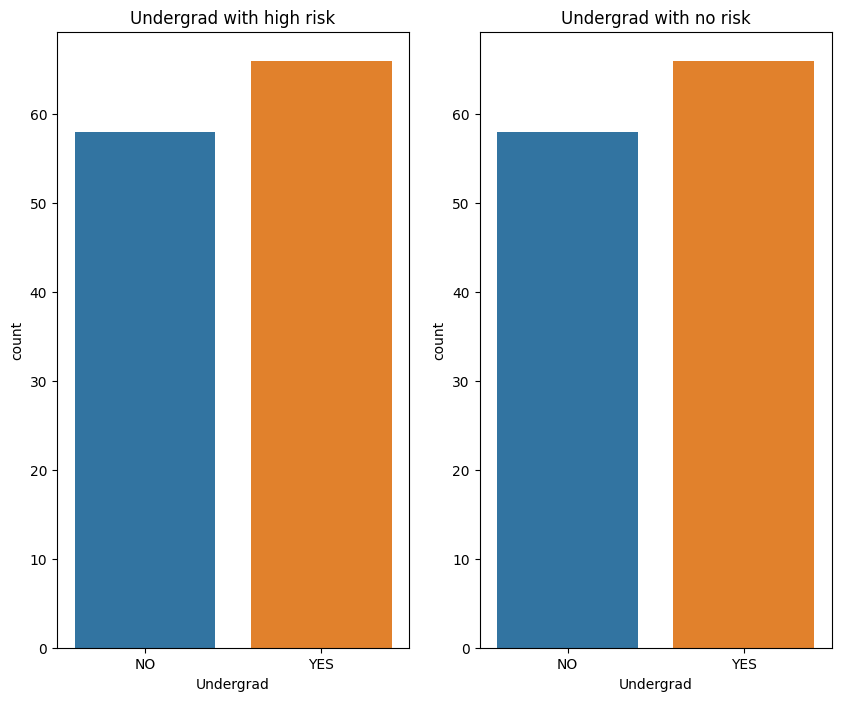

In [14]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.countplot(x='Undergrad',data=loan_asset_risky)
plt.title('Undergrad with high risk')

plt.subplot(1,2,2)
sns.countplot(x='Undergrad',data=loan_asset_risky)
plt.title('Undergrad with no risk')

**Marital Status wrt fraud**

Text(0.5, 1.0, 'Marital.Status with no risk')

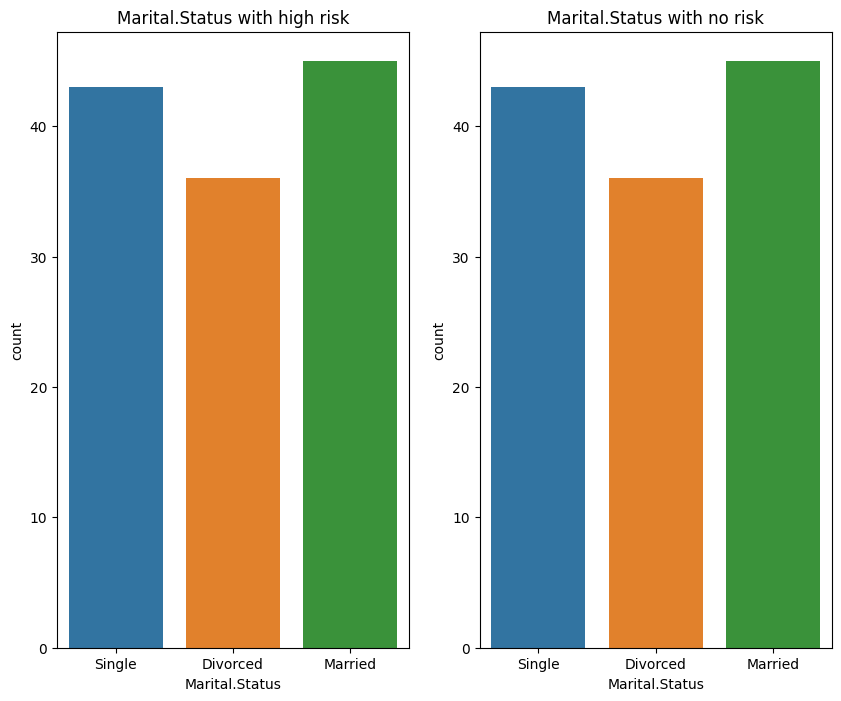

In [15]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.countplot(x='Marital.Status',data=loan_asset_risky)
plt.title('Marital.Status with high risk')

plt.subplot(1,2,2)
sns.countplot(x='Marital.Status',data=loan_asset_risky)
plt.title('Marital.Status with no risk')

**Residence vs fraud**

Text(0.5, 1.0, '\tUrban with no risk')

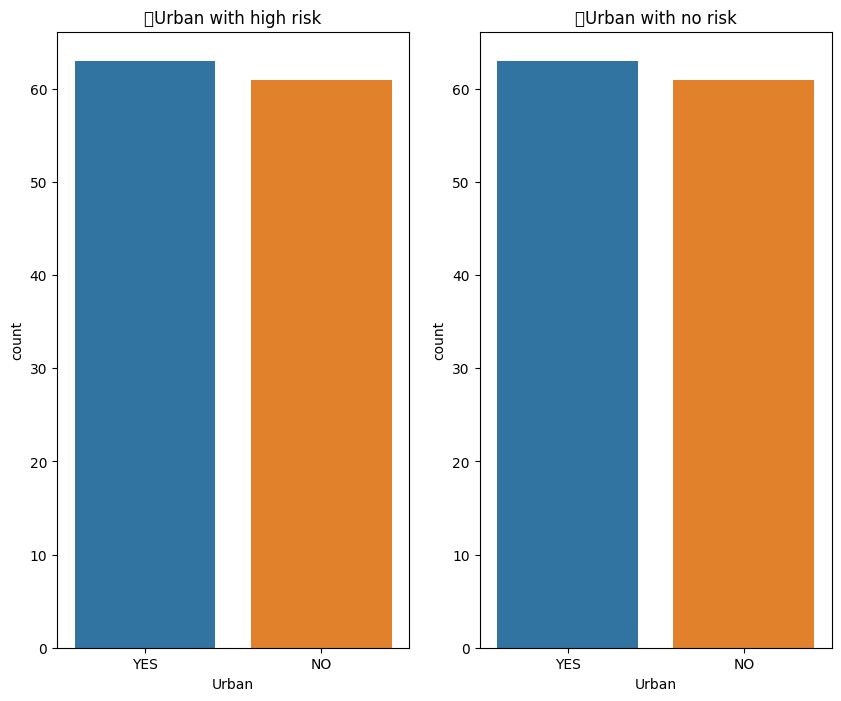

In [16]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.countplot(x='Urban',data=loan_asset_risky)
plt.title('	Urban with high risk')

plt.subplot(1,2,2)
sns.countplot(x='Urban',data=loan_asset_risky)
plt.title('	Urban with no risk')

**Data Preprocessing**

In [17]:
data2=data1.copy()
data2=data2.rename(columns={'Undergrad':'undergrad','Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_Population','Work.Experience':'Workexp','Urban':'urban'})
data2.head()

,undergrad,marital_status,taxable_income,city_Population,Workexp,urban,loan_asset_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [18]:
data2.drop('taxable_income',axis=1,inplace=True)
data2.head()

,undergrad,marital_status,city_Population,Workexp,urban,loan_asset_type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [19]:
x=data2.iloc[:,:5]
y=data2.iloc[:,5]
x

,undergrad,marital_status,city_Population,Workexp,urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [20]:
x=pd.get_dummies(x)
x

,city_Population,Workexp,undergrad_NO,undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [21]:
label=LabelEncoder()
y=label.fit_transform(y)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [23]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',y_train.shape)
print('Shape of y_train:',x_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (480, 9)
Shape of x_test: (480,)
Shape of y_train: (120, 9)
Shape of y_test: (120,)


**Decision Tree Model**

In [24]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

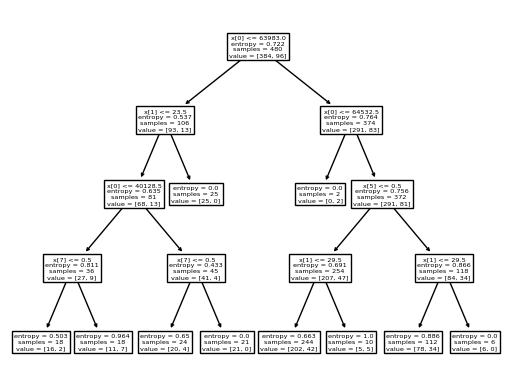

In [25]:
from sklearn import tree
tree.plot_tree(model);

In [26]:
y_pred=model.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
pd.crosstab(y_test,y_pred)

col_0,0
row_0,
0,92
1,28


In [29]:
confusion_matrix(y_test,y_pred)

array([[92,  0],
       [28,  0]])

In [30]:
np.mean(y_pred==y_test)

0.7666666666666667

**Model Building Using Gini Index**

In [34]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [35]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

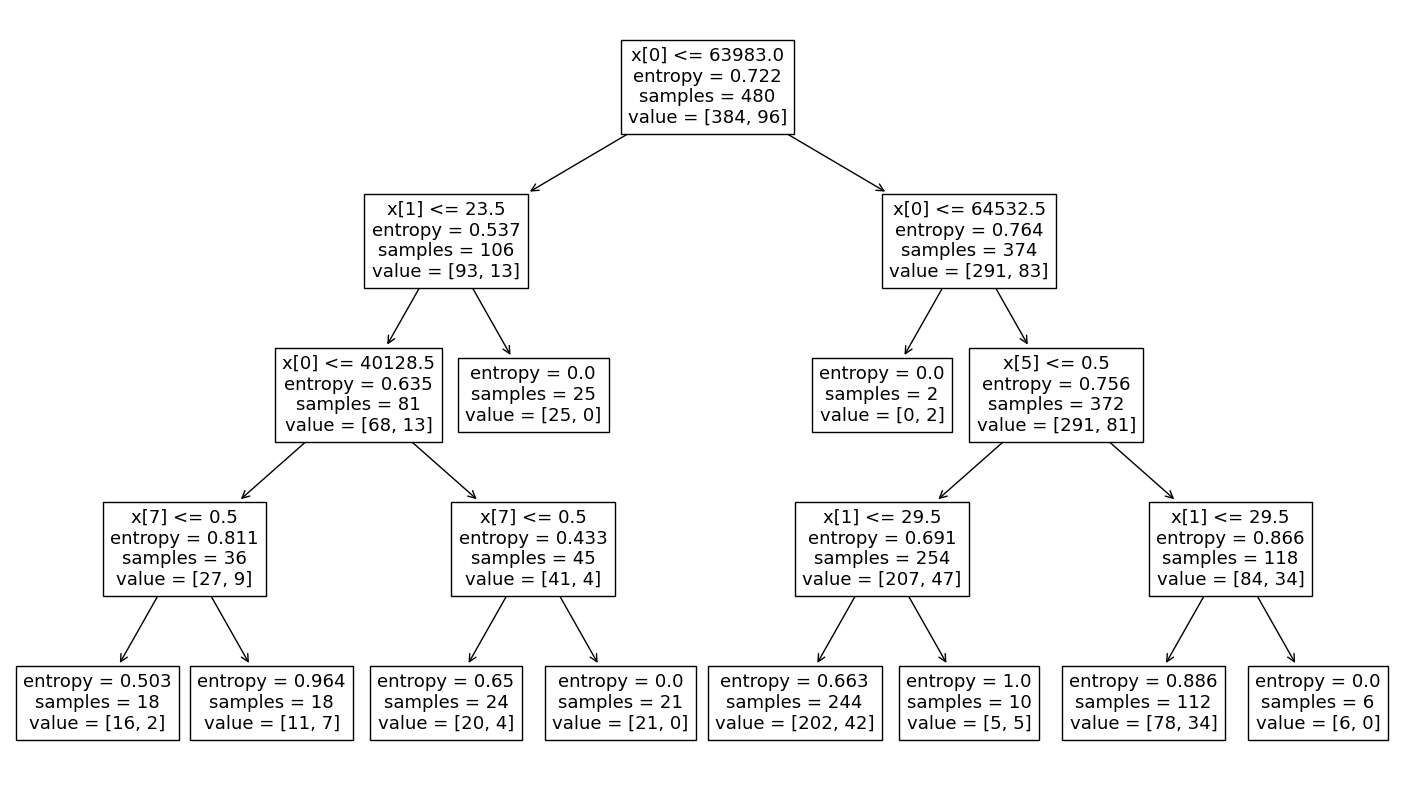

In [36]:
plt.figure(figsize=(18,10))
tree.plot_tree(model);

In [47]:
y_pred=model.predict(x_test)

In [48]:
np.mean(y_pred==y_test)

0.7666666666666667

In [49]:
pd.crosstab(y_pred,y_test)

col_0,0,1
row_0,,
0,92,28


In [52]:
confusion_matrix(y_test,y_pred)

array([[92,  0],
       [28,  0]])

**GridSearch for hyperparameter tuning**

In [61]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [67]:
param={'criterion':['gini','entropy'],
       'max_depth':range(1,10),
       'min_samples_split':range(1,10),
       'min_samples_leaf':range(1,10)}

In [74]:
model=DecisionTreeClassifier()
grid=GridSearchCV(estimator=model,param_grid=param,cv=kfold)

In [75]:
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [76]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7933333333333332


In [77]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [78]:
new_model=grid.best_estimator_
model.fit(x,y)

DecisionTreeClassifier()

In [84]:
result=cross_val_score(new_model,x,y,cv=kfold)
result.mean()*100

79.33333333333333

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



<Axes: >

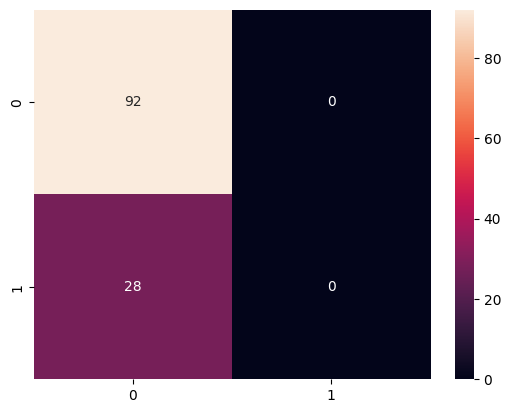

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

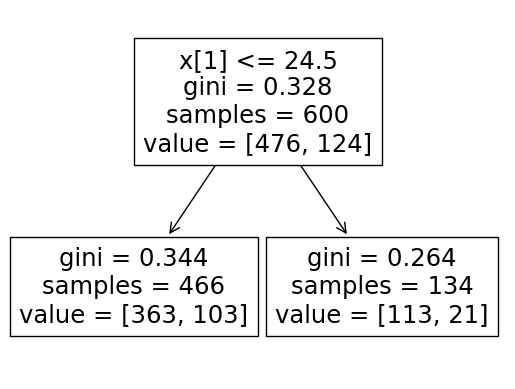

In [92]:
tree.plot_tree(new_model);